In [1]:
import sys

import polars as pl
import matplotlib.pyplot as plt

work_path = "/home/haselab/Documents/tat/Research/"
sys.path.append(f"{work_path}app/torch_libs/")

from run_manager import RunManager, RunsManager, RunViewer



In [4]:

rv = RunViewer(exp_path="/home/haselab/Documents/tat/Research/app/ee/exp_fil_data")
rv.write_stats()

df_stats = rv.fetch_stats()
df_stats_ext = df_stats.filter((pl.col("run_id") == 2))
# df_stats_ext = df_stats.filter((pl.col("fils") == 1) & (pl.col("num_data") == 10000))

run_ids = df_stats_ext["run_id"]
df_mets = rv.fetch_metrics()
df_agg = df_mets.group_by(by="run_id", maintain_order=True).agg(pl.all())
df_agg = df_agg.filter((pl.col("run_id").is_in(run_ids)))

display(df_agg)

run_id,step,lr,epoch,train_loss,train_acc,val_loss,val_acc
i32,list[i64],list[f64],list[i64],list[f64],list[f64],list[f64],list[f64]
2,"[1, 2, … 100]","[0.005, 0.004999, … 0.000001]","[1, 2, … 100]","[0.08403, 0.071941, … 0.033805]","[0.3431, 0.44724, … 0.74944]","[0.075028, 0.068612, … 0.031281]","[0.4204, 0.4779, … 0.7735]"


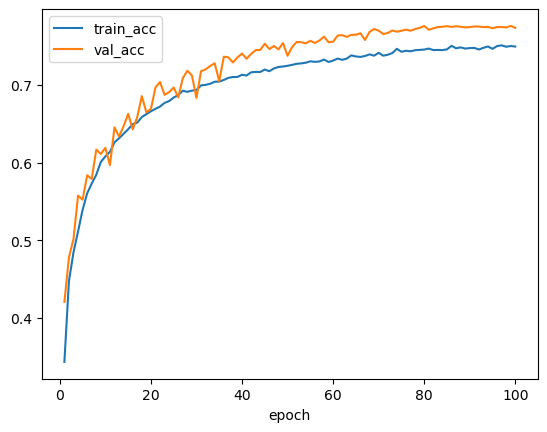

In [8]:
x_col = "epoch"
y_cols = ["train_acc", "val_acc"]

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)
ax[0][0].set_xlabel(x_col)

for y_col in y_cols:
    for df_row in df_agg.iter_rows(named=True):
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        # label = df_stats.filter(pl.col("run_id") == df_row["run_id"])[y_col][0]
        label = y_col

    ax[0][0].plot(x, y, label=label)

ax[0][0].legend()





In [ ]:
x_col = "epoch"
y_cols = "val_loss"
label_col = "run_id"

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)
ax[0][0].set_xlabel(x_col)

for y_col in y_cols:
    ax[0][0].set_ylabel(y_col)
    for df_row in df_agg.iter_rows(named=True):
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = df_stats.filter(pl.col("run_id") == df_row["run_id"])[label_col][0]

    ax[0][0].plot(x, y, label=label)

ax[0][0].legend()





run_id,max_lr,epochs,batch_size,ensemble_type,train_trans,val_trans,num_data,iters/epoch,dataset,model_arc,fils,ensembles,params,loss_func,optimizer,scheduler,lr,epoch,train_loss,train_acc,val_loss,val_acc
i64,f64,i64,i64,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,f64,i64,f64,f64,f64,f64
0,0.005,100,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",50000,400,"""cifar10_train""","""models.gitresn…","""2""",1024,11694080,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.000001,100,0.031755,0.92602,0.063555,0.8595
1,0.005,100,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",50000,400,"""cifar10_train""","""models.gitresn…","""4""",256,11423232,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.000001,100,0.02628,0.9362,0.062086,0.8713
2,0.005,100,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",50000,400,"""cifar10_train""","""models.gitresn…","""8""",64,11289728,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.000001,100,0.01468,0.96444,0.062678,0.8841
3,0.005,100,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",50000,400,"""cifar10_train""","""models.gitresn…","""16""",16,11223456,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.000001,100,0.00511,0.98804,0.065683,0.9024
4,0.005,100,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",50000,400,"""cifar10_train""","""models.gitresn…","""32""",4,11190440,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.000001,100,0.001427,0.99678,0.074386,0.9134
6,0.005,100,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",50000,400,"""cifar10_train""","""models.gitresn…","""64""",1,11173962,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.000001,100,0.000705,0.99846,0.067782,0.9325


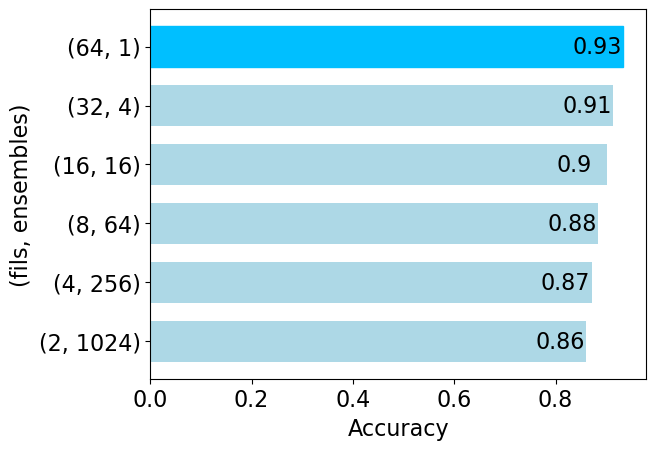

In [57]:
import polars as pl
import matplotlib.pyplot as plt
df = pl.read_csv("/home/haselab/Documents/tat/Research/app/ee/exp_ens.csv")

df = df.filter((pl.col("num_data") == 50000) & (pl.col("fils") != 48))
df = df.with_columns(pl.col("fils").cast(pl.Utf8))
display(df)
x = df["fils"]
y = df["val_acc"]

fig, ax = plt.subplots()

fsize = 16

x = [ "(2, 1024)", "(4, 256)", "(8, 64)", "(16, 16)", "(32, 4)","(64, 1)",       ]

bars = ax.barh(x, y, label='bar', height=0.7, color='lightblue')
ax.set_xlabel("Accuracy", fontsize=fsize)
ax.set_ylabel("(fils, ensembles)", fontsize=fsize)
ax.tick_params(labelsize=fsize)

bars[-1].set_color('deepskyblue')
    
for bar in bars:
    xval = bar.get_width()
    plt.text(xval - 0.10, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='left', va='center', fontsize=fsize)
    # plt.text(xval - 0.025, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='left', va='center', fontsize=fsize)